In [1]:
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import numpy as np
import pandas as pd
from matplotlib import colormaps, pyplot as plt
from pandas.api.types import CategoricalDtype
from visutils import *

In [2]:
cps04 = pd.read_csv('./data/acsProcessed20250312.csv')
midage = cps04.loc[cps04['Age Group'] == '18-64'].reset_index(drop = True)
midage_ft = midage.loc[midage['Work Status'] == 'Full time'].reset_index(drop = True)

highInc = midage_ft.groupby('State')[['Total Income']].mean().sort_values('Total Income', ascending = False).index[0:5]

# create a flag for DC, elsewhere
midage_ft.loc[midage_ft['State'] == 'District of Columbia', 'Location'] = 'District of Columbia'
midage_ft.loc[midage_ft['State'].isin(highInc[1:]), 'Location'] = 'Other High Income State'
midage_ft.loc[~midage_ft['State'].isin(highInc), 'Location'] = 'Elsewhere'

# DC income is substantially higher than other states - why?

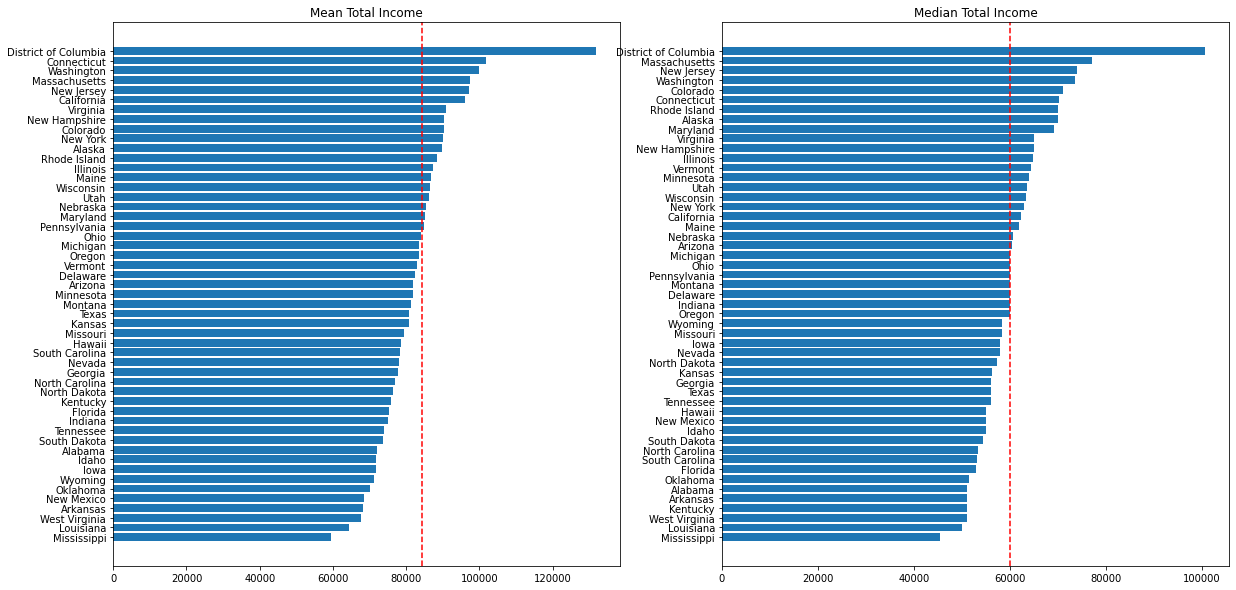

In [3]:
grpd_mn = midage_ft.groupby('State')[['Total Income']].mean().sort_values('Total Income')
grpd_md = midage_ft.groupby('State')[['Total Income']].median().sort_values('Total Income')
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
ax[0].barh(grpd_mn.index, grpd_mn['Total Income'])
ax[1].barh(grpd_md.index, grpd_md['Total Income'])
ax[0].axvline(midage_ft['Total Income'].mean(), color = 'red', ls = '--')
ax[1].axvline(midage_ft['Total Income'].median(), color = 'red', ls = '--')
ax[0].set_title('Mean Total Income')
ax[1].set_title('Median Total Income')
plt.show()

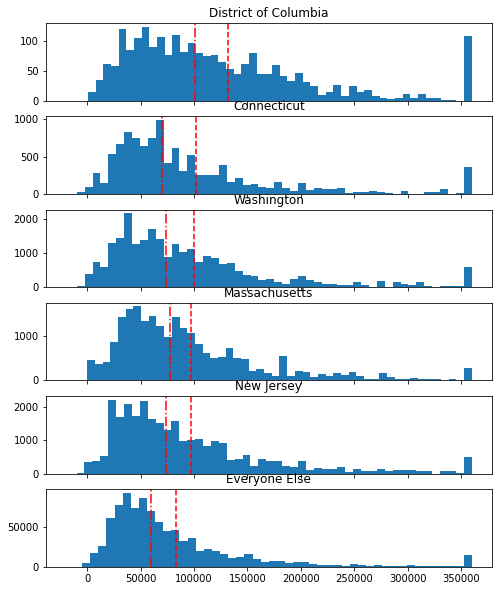

In [4]:
# is it a few outliers or the whole distribution? (significant right skew, not just a few outliers)
fig, axs = plt.subplots(nrows = len(highInc) + 1, ncols = 1, sharex = True, figsize = (8, 10))

for i, st in enumerate(highInc):
    axs[i].hist(midage_ft.loc[midage_ft['State'] == st, 'Capped Income'], bins = 50)
    axs[i].axvline(midage_ft.loc[midage_ft['State'] == st, 'Total Income'].mean(), color = 'red', linestyle = '--')
    axs[i].axvline(midage_ft.loc[midage_ft['State'] == st, 'Total Income'].median(), color = 'red', linestyle = '-.')
    axs[i].set_title(st)

axs[len(highInc)].hist(midage_ft.loc[~midage_ft['State'].isin(highInc), 'Capped Income'], bins = 50)
axs[len(highInc)].axvline(midage_ft.loc[~midage_ft['State'].isin(highInc), 'Total Income'].mean(), color = 'red', linestyle = '--')
axs[len(highInc)].axvline(midage_ft.loc[~midage_ft['State'].isin(highInc), 'Total Income'].median(), color = 'red', linestyle = '-.')
axs[len(highInc)].set_title('Everyone Else')

plt.show()

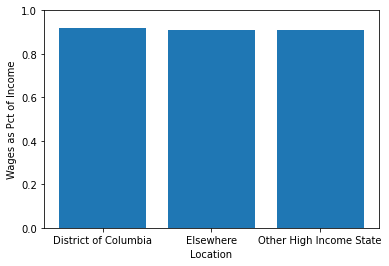

In [5]:
# does the extra income come from wages? (yes)
singleBar(midage_ft, 'Location', 'Wages as Pct of Income', yl = (0, 1))

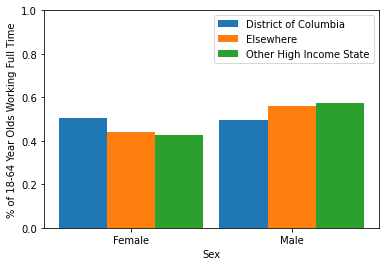

In [6]:
# do DC residents skew male? (no, female)

# create a temporary scaled counter
temp = (1 / midage_ft.groupby('Location')[['Total Income']].count().rename(columns = {'Total Income': 'Scaled'})).reset_index()
midage_ft = pd.merge(midage_ft, temp, on = 'Location', how = 'outer')

groupedBar(midage_ft, 'Sex', 'Location', 'Scaled', function = 'sum', yl = (0, 1)
           , ylab = '% of 18-64 Year Olds Working Full Time')

# clean up temporary scaled counter
midage_ft = midage_ft.drop(columns = ['Scaled'])

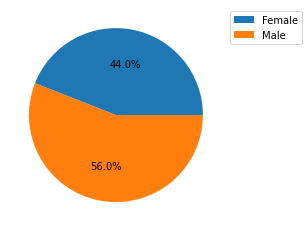

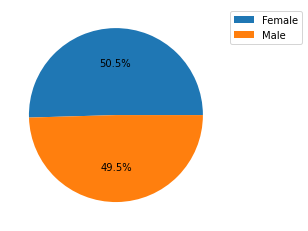

In [7]:
pie(midage_ft, 'Sex')
pie(midage_ft.loc[midage_ft['State'] == 'District of Columbia'], 'Sex')

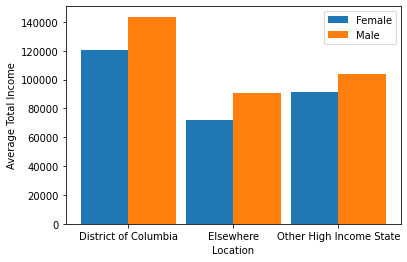

In [8]:
# is the wage gap reversed there? (no)
groupedBar(midage_ft, 'Location', 'Sex', 'Total Income', function = 'mean'
           , ylab = 'Average Total Income')

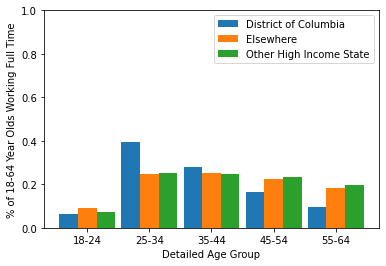

In [9]:
# do DC residents skew older? (no, younger)

# create a temporary scaled counter
temp = (1 / midage_ft.groupby('Location')[['Total Income']].count().rename(columns = {'Total Income': 'Scaled'})).reset_index()
midage_ft = pd.merge(midage_ft, temp, on = 'Location', how = 'outer')

groupedBar(midage_ft, 'Detailed Age Group', 'Location', 'Scaled', function = 'sum', yl = (0, 1)
           , ylab = '% of 18-64 Year Olds Working Full Time')

# clean up temporary scaled counter
midage_ft = midage_ft.drop(columns = ['Scaled'])

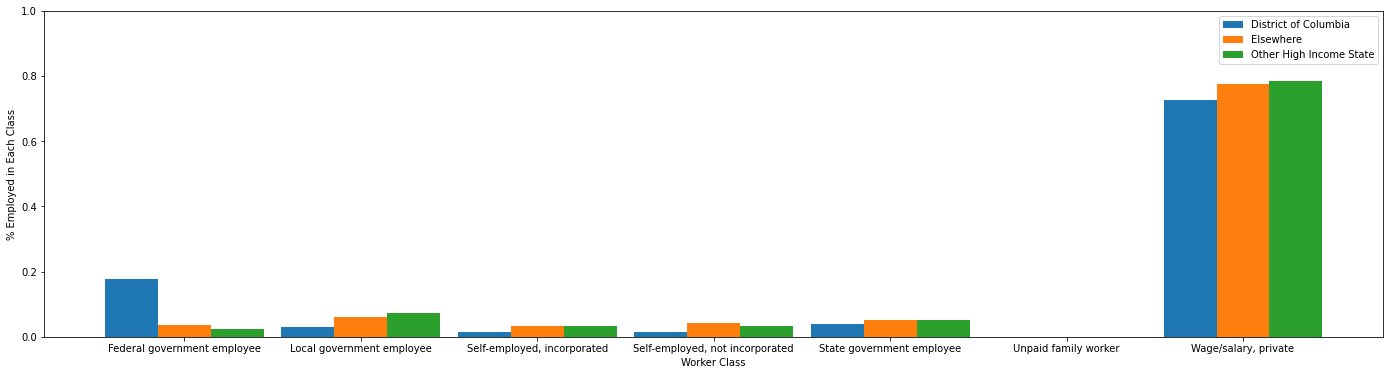

In [10]:
# are DC residents employed in different sectors? (more in federal government)

# create a temporary scaled counter
temp = (1 / midage_ft.groupby('Location')[['Total Income']].count().rename(columns = {'Total Income': 'Scaled'})).reset_index()
midage_ft = pd.merge(midage_ft, temp, on = 'Location', how = 'outer')

groupedBar(midage_ft, 'Worker Class', 'Location', 'Scaled', function = 'sum', yl = (0, 1)
           , ylab = '% Employed in Each Class', figsize = (24, 6))

# clean up
midage_ft = midage_ft.drop(columns = ['Scaled'])

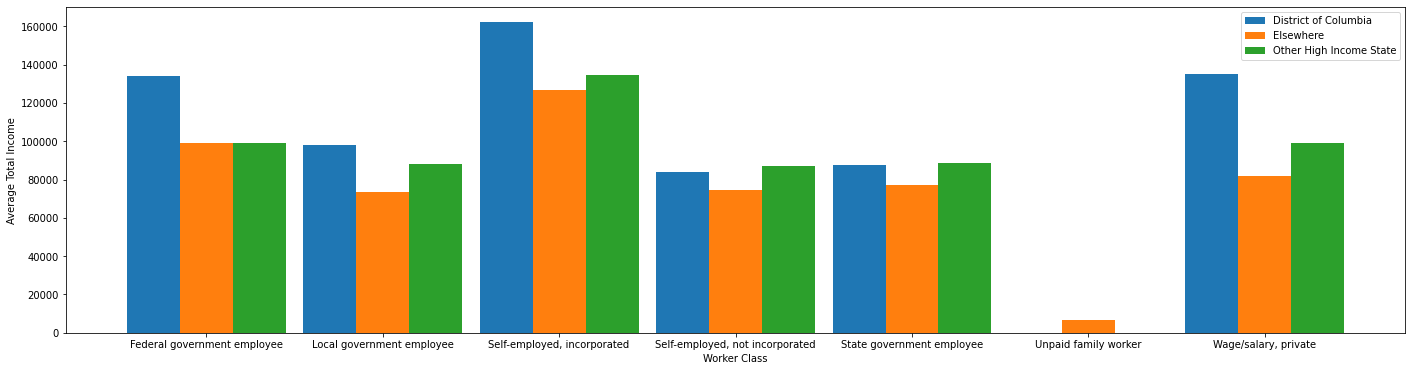

In [11]:
# does income vary by sector differently there? (pay disparity most extreme for fed, self employed (inc), and private)
groupedBar(midage_ft, 'Worker Class', 'Location', 'Total Income', function = 'mean'
           , ylab = 'Average Total Income', figsize = (24, 6))

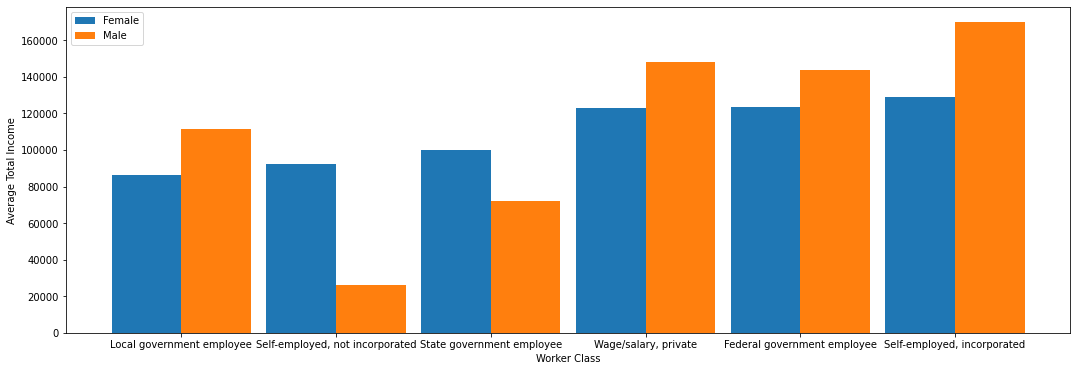

In [12]:
# does this vary by sex?
groupedBar(midage_ft.loc[midage_ft['State'] == 'District of Columbia'], 'Worker Class', 'Sex', 'Total Income'
           , ylab = 'Average Total Income', sortvalues = True, figsize = (18, 6)
          )

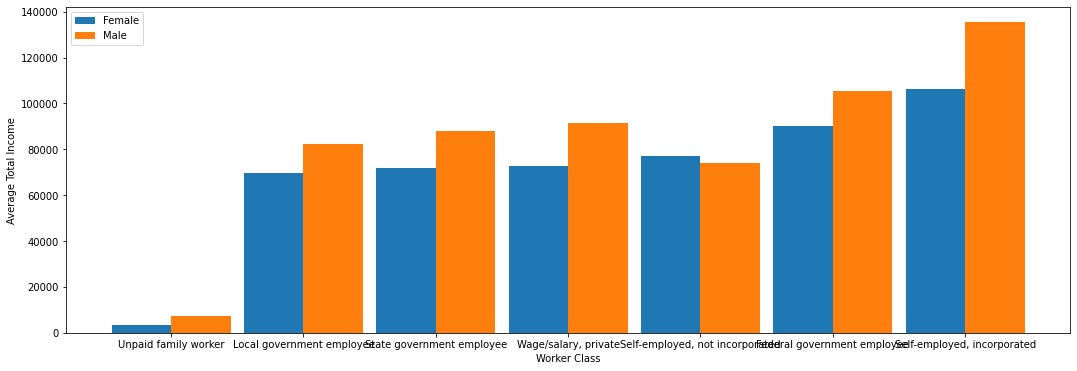

In [13]:
# does this vary by sex?
groupedBar(midage_ft, 'Worker Class', 'Sex', 'Total Income'
           , ylab = 'Average Total Income', sortvalues = True, figsize = (18, 6)
          )